En el apartado "Loading Data" de esta URL:

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Se explica cómo se cargan una serie de datos: 

1. Utiliza esa misma forma para cargar los datos.
2. Limpia los datos si es necesario
3. Dibuja con plotly los que creas necesarios gráficos para entender los datos.
4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
5. Intenta superarte en el score cambiando las features de los algoritmos.

In [11]:
import pandas as pd 
import numpy as np 

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [3]:
cancer = datasets.load_breast_cancer()
cancer

{&#39;data&#39;: array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 &#39;target&#39;: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 

In [4]:
print("Features: ", cancer.feature_names)

Features:  [&#39;mean radius&#39; &#39;mean texture&#39; &#39;mean perimeter&#39; &#39;mean area&#39;
 &#39;mean smoothness&#39; &#39;mean compactness&#39; &#39;mean concavity&#39;
 &#39;mean concave points&#39; &#39;mean symmetry&#39; &#39;mean fractal dimension&#39;
 &#39;radius error&#39; &#39;texture error&#39; &#39;perimeter error&#39; &#39;area error&#39;
 &#39;smoothness error&#39; &#39;compactness error&#39; &#39;concavity error&#39;
 &#39;concave points error&#39; &#39;symmetry error&#39; &#39;fractal dimension error&#39;
 &#39;worst radius&#39; &#39;worst texture&#39; &#39;worst perimeter&#39; &#39;worst area&#39;
 &#39;worst smoothness&#39; &#39;worst compactness&#39; &#39;worst concavity&#39;
 &#39;worst concave points&#39; &#39;worst symmetry&#39; &#39;worst fractal dimension&#39;]


In [5]:
print("Labels: ", cancer.target_names)

Labels:  [&#39;malignant&#39; &#39;benign&#39;]


In [6]:
cancer.data.shape

(569, 30)

In [7]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2,random_state=70)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25,random_state=150)

In [19]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088


In [20]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.972027972027972


In [14]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


In [21]:
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9574468085106383
Recall: 1.0


Dibuja con plotly los que creas necesarios gráficos para entender los datos.

In [22]:
import matplotlib.pyplot as plt 

&lt;function matplotlib.pyplot.show(*args, **kw)&gt;

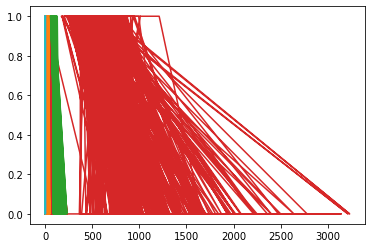

In [23]:
plt.plot(X_train, y_train)
plt.show

&lt;function matplotlib.pyplot.show(*args, **kw)&gt;

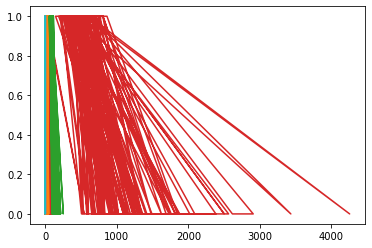

In [24]:
plt.plot(X_test, y_test)
plt.show

In [25]:
print(plt.style.available)

[&#39;Solarize_Light2&#39;, &#39;_classic_test_patch&#39;, &#39;bmh&#39;, &#39;classic&#39;, &#39;dark_background&#39;, &#39;fast&#39;, &#39;fivethirtyeight&#39;, &#39;ggplot&#39;, &#39;grayscale&#39;, &#39;seaborn&#39;, &#39;seaborn-bright&#39;, &#39;seaborn-colorblind&#39;, &#39;seaborn-dark&#39;, &#39;seaborn-dark-palette&#39;, &#39;seaborn-darkgrid&#39;, &#39;seaborn-deep&#39;, &#39;seaborn-muted&#39;, &#39;seaborn-notebook&#39;, &#39;seaborn-paper&#39;, &#39;seaborn-pastel&#39;, &#39;seaborn-poster&#39;, &#39;seaborn-talk&#39;, &#39;seaborn-ticks&#39;, &#39;seaborn-white&#39;, &#39;seaborn-whitegrid&#39;, &#39;tableau-colorblind10&#39;]


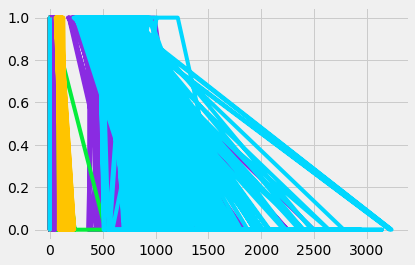

In [29]:
plt.style.use('seaborn-bright')
plt.plot(X_train, y_train)
plt.show()

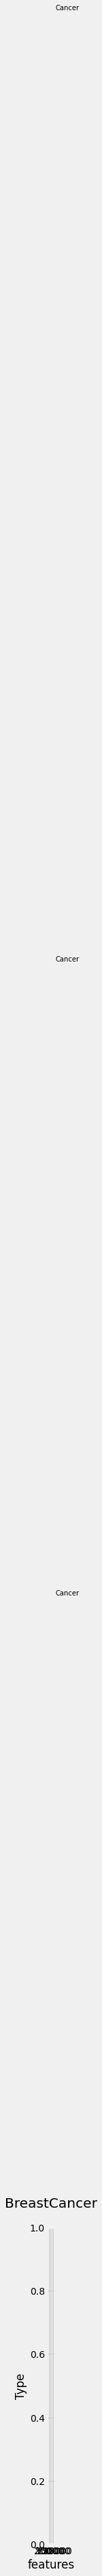

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
labels = cancer.feature_names

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "Cancer", fontsize=10,
            verticalalignment="center")

# Now we move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='features', ylabel='Type',
       title='BreastCancer')

ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()